In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn import metrics

import statsmodels.api as sm



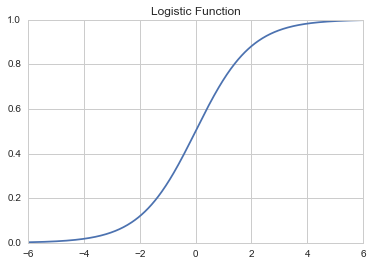

In [5]:
def logistic(t):
    return 1/(1 + math.exp(-1 * t))

t = np.linspace(-6,6,500)

y = np.array([logistic(ele) for ele in t])

plt.plot(t,y)
plt.title('Logistic Function')

In [6]:
df = sm.datasets.fair.load_pandas().data

In [7]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273
4,5,27,9.0,1,1,14,3,4,4.666666


In [11]:
def affair_check(x):
    if x == 0:
        return 0
    else:
        return 1

In [12]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [13]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3,32,9.0,3,3,17,2,5,0.111111,1
1,3,27,13.0,3,1,14,3,4,3.230769,1
2,4,22,2.5,0,1,16,3,5,1.400000,1
3,4,37,16.5,4,3,16,5,5,0.727273,1
4,5,27,9.0,1,1,14,3,4,4.666666,1


In [14]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3,32.0,9.0,3.0,3,17,2,5,0.111111,1
1,3,27.0,13.0,3.0,1,14,3,4,3.230769,1
2,4,22.0,2.5,0.0,1,16,3,5,1.400000,1
3,4,37.0,16.5,4.0,3,16,5,5,0.727273,1
4,5,27.0,9.0,1.0,1,14,3,4,4.666666,1
5,4,27.0,9.0,0.0,2,14,3,4,4.666666,1
6,5,37.0,23.0,5.5,2,12,5,4,0.852174,1
7,5,37.0,23.0,5.5,2,12,2,3,1.826086,1
8,3,22.0,2.5,0.0,2,12,3,3,4.799999,1
9,3,27.0,6.0,0.0,1,16,3,5,1.333333,1


In [17]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


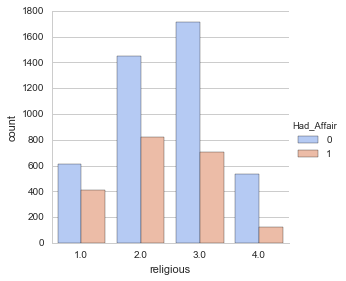

In [19]:
sns.factorplot('religious',data=df,hue='Had_Affair',palette = 'coolwarm',kind='count')

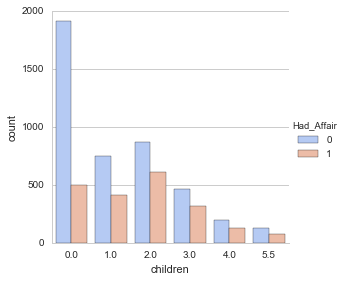

In [20]:
sns.factorplot('children',data=df,hue='Had_Affair',palette = 'coolwarm',kind='count')

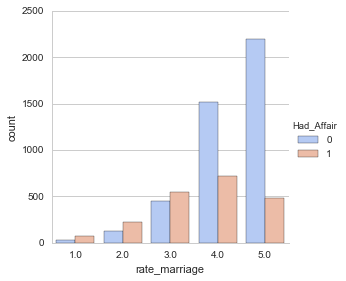

In [23]:
sns.factorplot('rate_marriage',data=df,hue='Had_Affair',palette = 'coolwarm',kind='count')

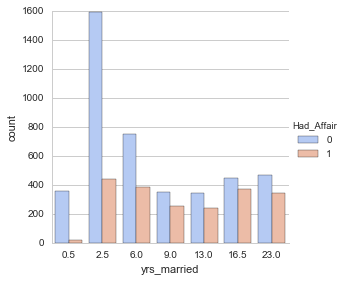

In [24]:
sns.factorplot('yrs_married',data=df,hue='Had_Affair',palette = 'coolwarm',kind='count')

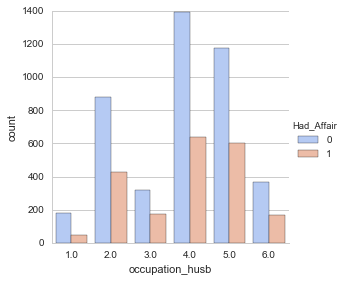

In [26]:
sns.factorplot('occupation_husb',data=df,hue='Had_Affair',palette = 'coolwarm',kind='count')

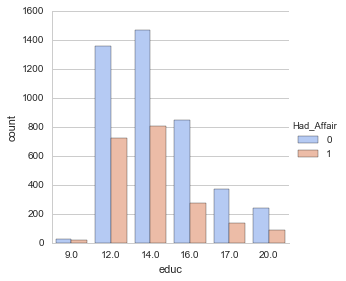

In [28]:
sns.factorplot('educ',data=df,hue='Had_Affair',palette = 'coolwarm',kind='count')

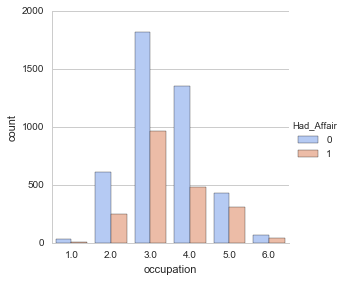

In [29]:
sns.factorplot('occupation',data=df,hue='Had_Affair',palette = 'coolwarm',kind='count')

In [31]:
occ_dummies = pd.get_dummies(df['occupation'])
husb_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [33]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [34]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [35]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3,32,9.0,3,3,17,0.111111
1,3,27,13.0,3,1,14,3.230769
2,4,22,2.5,0,1,16,1.400000
3,4,37,16.5,4,3,16,0.727273
4,5,27,9.0,1,1,14,4.666666


In [36]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
husb_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [38]:
dummies = pd.concat([occ_dummies,husb_occ_dummies],axis=1)

In [39]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [40]:
X = pd.concat([X,dummies],axis=1)

In [41]:
Y = df['Had_Affair']

In [43]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [44]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5,27,9.0,1,1,14,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [48]:
X = X.drop(['affairs'],axis=1)

In [50]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,1,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,0,1,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,0,1,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0,0,0,1,0,0,0,0,1,0
4,5,27,9.0,1,1,14,0,1,0,0,0,0,0,1,0,0


In [51]:
Y = np.ravel(Y)

In [52]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [53]:
log_model = LogisticRegression()

In [55]:
log_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
log_model.score(X,Y)

0.72588752748978946

In [58]:
Y.mean()

0.32249450204209867

In [64]:
coeff_df = DataFrame(list(zip(X.columns, np.transpose(log_model.coef_))))

In [66]:
coeff_df.columns = ['Coeffients','Values']

In [67]:
coeff_df

,Coeffients,Values
0,rate_marriage,[-0.697993156038]
1,age,[-0.0563826599784]
2,yrs_married,[0.103916850659]
3,children,[0.0181800154977]
4,religious,[-0.368666342905]
5,educ,[0.00863221149728]
6,occ2,[0.300737598166]
7,occ3,[0.611147324791]
8,occ4,[0.34967499164]
9,occ5,[0.945794294756]


In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [69]:
log_model2 = LogisticRegression()

In [71]:
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
log_model2.score(X_train,Y_train)

0.72727272727272729

In [73]:
class_predict = log_model2.predict(X_test)

In [74]:
print(metrics.accuracy_score(Y_test,class_predict))

0.721733668342
